In [37]:
import pandas as pd 
dados=pd.read_csv('log2.csv')
dados['Source Port'].value_counts()

58638    840
27005    513
443      273
57470    222
49418    210
        ... 
63182      1
61133      1
52937      1
1712       1
47111      1
Name: Source Port, Length: 22724, dtype: int64

In [203]:
import numpy as np
import pandas as pd
import time
from scipy import stats 
# plots
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
categoricos = dados.iloc[:,:4]
alvo = dados.iloc[:,4]
numericos = dados.iloc[:,5:]

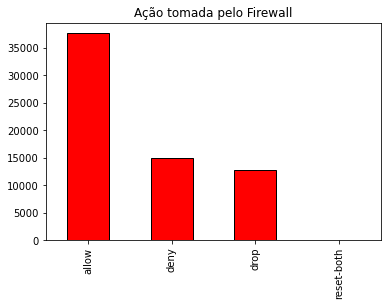

In [66]:
dados.Action.value_counts().plot(kind='bar',color='red',edgecolor='black')
plt.title('Ação tomada pelo Firewall')
plt.show()

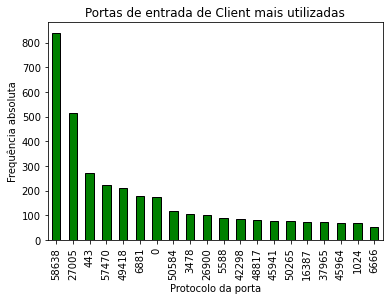

In [120]:
dados['Source Port'].value_counts()[0:20].plot(kind='bar',color='green',edgecolor='black')
plt.title('Portas de entrada de Client mais utilizadas')
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

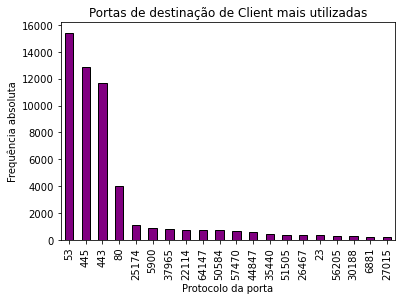

In [121]:
dados['Destination Port'].value_counts()[0:20].plot(kind='bar',color='purple',edgecolor='black')
plt.title('Portas de destinação de Client mais utilizadas')
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

In [188]:
normalizing = lambda x: np.log10(1+x)

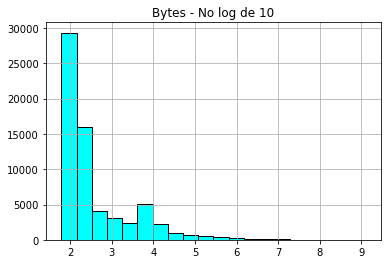

In [189]:
plt.hist(normalizing(dados['Bytes']), bins=20,color='cyan',edgecolor='black')
plt.grid()
plt.title('Bytes' + ' - No log de 10')
plt.show()

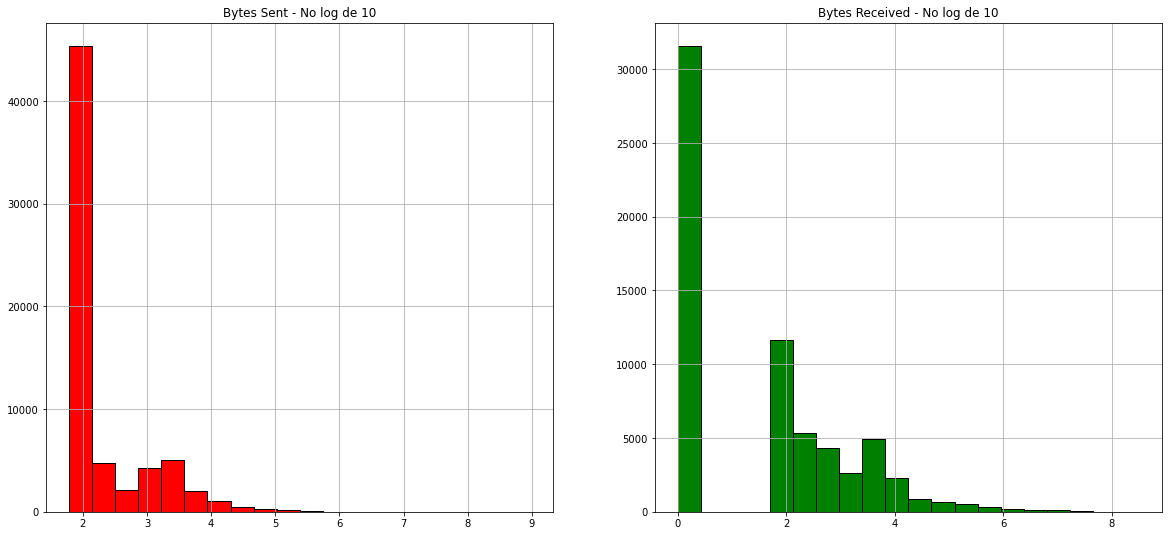

In [190]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.hist(normalizing(dados['Bytes Sent']), bins=20,color='red',edgecolor='black')
plt.grid()
plt.title('Bytes Sent' + ' - No log de 10')

plt.subplot(122)
plt.hist(normalizing(dados['Bytes Received']), bins=20,color='green',edgecolor='black')
plt.grid()
plt.title('Bytes Received' + ' - No log de 10')
plt.show()

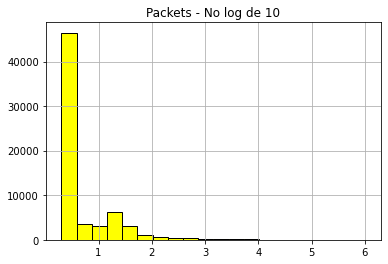

In [191]:
plt.hist(normalizing(dados['Packets']), bins=20,color='yellow',edgecolor='black')
plt.grid()
plt.title('Packets' + ' - No log de 10')
plt.show()

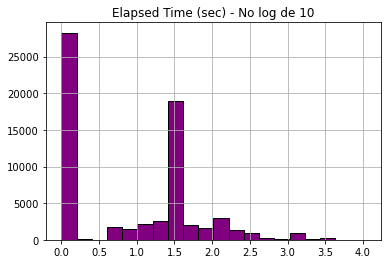

In [192]:
plt.hist(normalizing(dados['Elapsed Time (sec)']), bins=20,color='purple',edgecolor='black')
plt.grid()
plt.title('Elapsed Time (sec)' + ' - No log de 10')
plt.show()

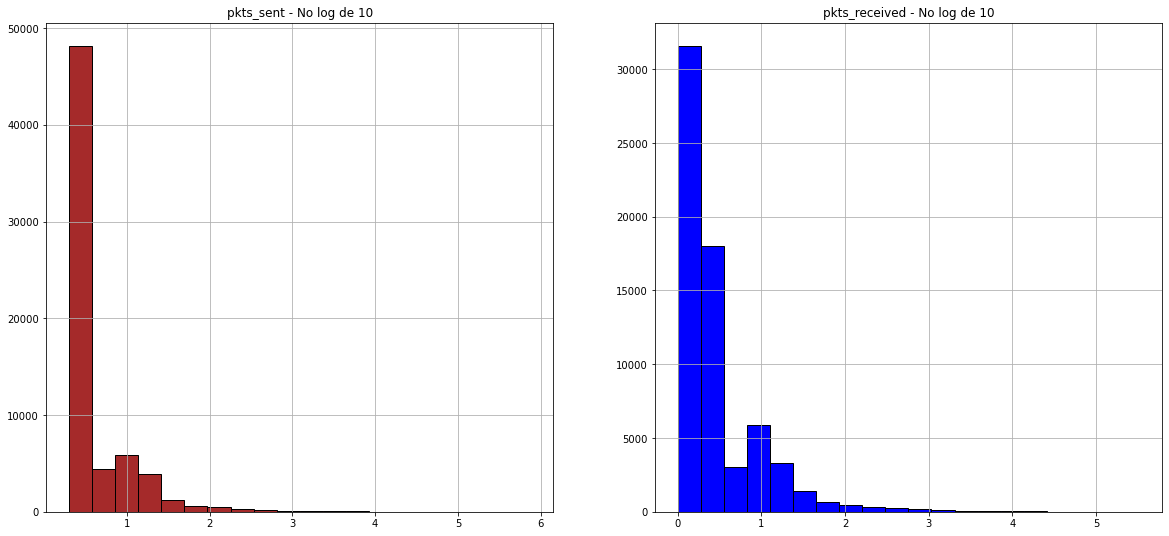

In [193]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.hist(normalizing(dados['pkts_sent']), bins=20,color='brown',edgecolor='black')
plt.grid()
plt.title('pkts_sent' + ' - No log de 10')

plt.subplot(122)
plt.hist(normalizing(dados['pkts_received']), bins=20,color='blue',edgecolor='black')
plt.grid()
plt.title('pkts_received' + ' - No log de 10')

plt.show()

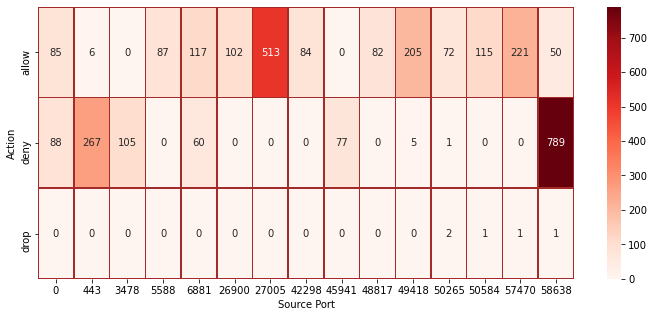

In [195]:
melhores_analise = dados[dados['Source Port'].isin(dados['Source Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Source Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Reds',
            linecolor='brown',
            linewidths=0.5)
plt.show()

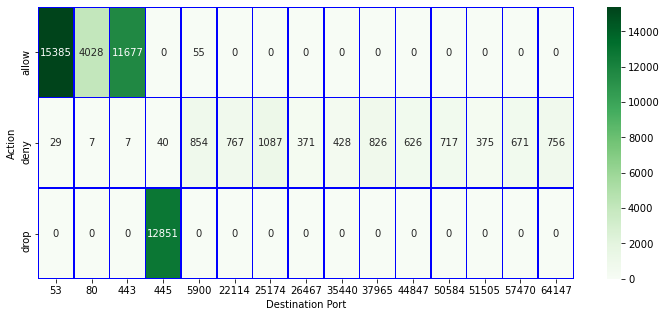

In [196]:
melhores_analise = dados[dados['Destination Port'].isin(dados['Destination Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Destination Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greens',
            linecolor='blue',
            linewidths=0.5)
plt.show()

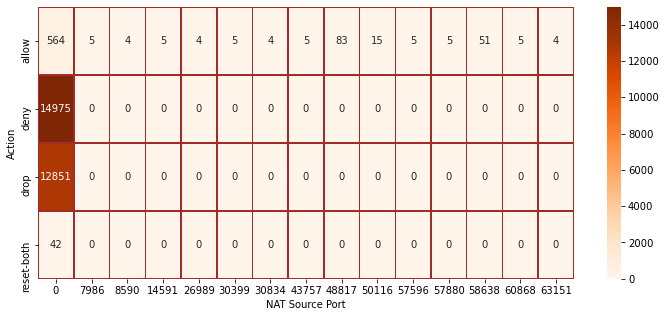

In [197]:
melhores_analise = dados[dados['NAT Source Port'].isin(dados['NAT Source Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Source Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Oranges',
            linecolor='brown',
            linewidths=0.5)
plt.show()

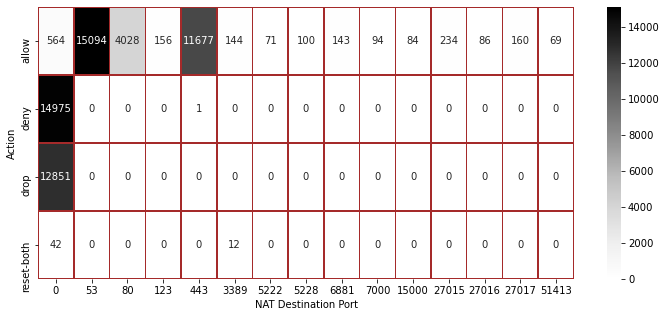

In [198]:
melhores_analise = dados[dados['NAT Destination Port'].isin(dados['NAT Destination Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Destination Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greys',
            linecolor='brown',
            linewidths=0.5)
plt.show()

In [ ]:
plt.scatter()